# **Figure SI-8 Treatment for 2018 Samples**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset43] ()
> c_2018_MH0264X07b_vals_003to011skip8_date_1.csv <br>
c_2018_MH0264X07b_vals_012to018_date_1.csv <br>
c_2018_MH0264X07b_vals_019to022_date_1.csv <br>
c_2018_MH0264X07b_vals_023to025_date_1.csv <br>
c_2018_MH0264X07b_vals_026to031_date_1.csv <br>
c_2018_MH0264X07b_vals_032to033_date_1.csv <br>
c_2018_MH0264X07b_vals_034to037_date_1.csv <br>
c_2018_MH0264X07b_vals_038to039_date_1.csv <br>
c_2018_MH0264X07b_vals_040only_date_1.csv <br>
c_2018_MH0264X07b_vals_041only_date_1.csv <br>
c_2018_MH0264X07b_vals_042to045_date_1.csv <br>
c_2018_MH0264X07b_vals_046to049_date_1.csv <br>
c_2018_MH0264X07b_vals_050to054_date_1.csv <br>
c_2018_MH0264X07b_vals_055to057_date_1.csv <br> <br>
c_2018_S18506_vals_002to007_date_1.csv <br>
c_2018_S18506_vals_008to015_date_1.csv <br>
c_2018_S18506_vals_016to022_date_1.csv <br>
c_2018_S18506_vals_023to025_date_1.csv <br>
c_2018_S18506_vals_026to030_date_1.csv <br>
c_2018_S18506_vals_031to034_date_1.csv <br>
c_2018_S18506_vals_035to038_date_1.csv <br>
c_2018_S18506_vals_039to047_date_1.csv <br>
c_2018_S18506_vals_048to054_date_1.csv <br>
c_2018_S18506_vals_055to059_date_1.csv

### Steps:
- follow script below

### Output:
- Figure SI8, type = .svg or .pdf, [FigureSI8] ()
> FigureSI8_date_MH0264x07b_1 <br>
FigureSI8_date_S18506_1

### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- Figure layout and extra labels were accomplished in [Inkscape 0.92.4] (https://inkscape.org/)

In [1]:
%pylab inline
import imageio
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('Figure_SI8')
except OSError:
    pass

In [18]:
##Choose the sample to plot
#sample_name = 'MH0264X07b'
sample_name = 'S18506'

In [19]:
##enter the figure name here that will be the filename for the image of the figure output below
FIG_name = 'FigureSI8_20190606_%s_' %(sample_name) ## underscore at end to allow indexing when saving below
FIG_name

'FigureSI8_20190606_S18506_'

In [20]:
files = sorted(glob(os.path.join('dataset_43', '*{}_*.csv'.format(sample_name))))
files

['dataset_43\\c_2018_S18506_vals_002to007_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_008to015_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_016to022_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_023to025_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_026to030_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_031to034_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_035to038_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_039to047_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_048to054_20190717_1.csv',
 'dataset_43\\c_2018_S18506_vals_055to059_20190717_1.csv']

In [21]:
sample_names = [os.path.basename(i).split('_', 4)[2] for i in files]
sample_name = sample_names[0] ##doesn't matter which
sample_name

'S18506'

In [22]:
files_cut = [i[:-6] for i in files]  ##cuts off 6 characters from the end
files_cut

['dataset_43\\c_2018_S18506_vals_002to007_20190717',
 'dataset_43\\c_2018_S18506_vals_008to015_20190717',
 'dataset_43\\c_2018_S18506_vals_016to022_20190717',
 'dataset_43\\c_2018_S18506_vals_023to025_20190717',
 'dataset_43\\c_2018_S18506_vals_026to030_20190717',
 'dataset_43\\c_2018_S18506_vals_031to034_20190717',
 'dataset_43\\c_2018_S18506_vals_035to038_20190717',
 'dataset_43\\c_2018_S18506_vals_039to047_20190717',
 'dataset_43\\c_2018_S18506_vals_048to054_20190717',
 'dataset_43\\c_2018_S18506_vals_055to059_20190717']

In [23]:
##to get scan range for each imported file, that was used in the average
scans = [os.path.basename(i).split('_', 4)[-1] for i in files_cut]  ##full scan range
first_scan = [i[0:3] for i in scans]  ##gets the first scan of each average
first_scan

['002', '008', '016', '023', '026', '031', '035', '039', '048', '055']

In [24]:
##read in csv or txt files (in the following case, tab-delimited)
##be sure it matches the files you are interested in importing
frames = [pd.read_csv(name, delimiter=',', header=0, index_col = ['energy'], usecols=['energy','mean'])
          for name in files]
all_data = pd.concat(frames, axis=1)
all_data.index.name = 'energy eV'
all_data.columns = ['s{}'.format(x) for x in first_scan]
all_data
#frames

,s002,s008,s016,s023,s026,s031,s035,s039,s048,s055
energy eV,,,,,,,,,,
2463.12,-0.004132,-0.001473,-0.004233,-0.005474,-0.000808,-0.007295,0.001614,-0.000262,-0.001818,0.003601
2463.36,0.002837,-0.001746,-0.000152,-0.000679,-0.001078,-0.002954,-0.002804,0.002471,-0.000889,-0.000785
2463.60,0.001055,-0.000758,-0.000653,0.001234,0.001885,0.001247,-0.007198,-0.001506,-0.001292,0.000982
2463.84,-0.006435,0.001751,-0.003266,0.000071,-0.006003,0.003485,0.004614,0.003152,-0.003042,-0.001534
2464.08,0.006958,-0.003593,-0.001044,0.001189,0.000484,-0.002341,0.000578,-0.001189,0.000712,-0.002431
2464.32,0.001204,0.000860,0.001151,0.004960,0.004133,0.004284,-0.001524,-0.000404,0.002895,0.001769
2464.56,-0.001903,0.002241,0.004004,-0.006941,0.001112,0.000618,0.000380,0.002745,0.000958,0.000214
2464.80,0.000416,0.002719,0.004194,0.005642,0.000274,0.002956,0.004340,-0.005006,0.002477,-0.001817
2465.04,0.002647,0.008246,0.002858,0.011757,0.002910,0.003880,0.001416,0.003503,-0.002641,0.008827


In [25]:
all_data.shape[1] ##number of particles considered

10

In [26]:
##correction for energy axis differences between beamtimes; calibrate to beamtime 2017

energy_18 = (all_data.index) + 0.23

In [28]:
##Choose appropriate sample
##lists the order of columns to arrange in waterfall plot

## for sample MH0264X07b
#all_data_re = all_data[['s032', 's003', 's050', 's042', 's023', 's046', 's026', 's012','s019', 's034', 's055', 's041', 's040', 's038']]

## for sample S18506
all_data_re = all_data[['s002', 's048', 's055', 's031', 's039', 's035', 's026', 's023','s008', 's016']]

In [29]:
##standards for publication figures
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

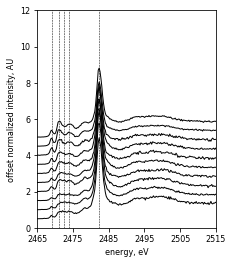

In [30]:
##waterwall plotting
##full figure (publication size)
figsize(3.2,4)

offset = 0 #giving offset a start value
n = all_data.shape[1] #number of columns in dataframe is the number of colors needed
color = iter(cm.seismic_r(np.linspace(0.8,1,n))) #assigning the colormap type to be iterated over the number of columns
    #cm... is the name of the colormap; put '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html
    
#waterfall maker
for name in all_data_re:
    offset = offset+0.5   ##CHOOSE Y OFFSET HERE
    #c = next(color)
    #plt.scatter(all_data.index, all_data[name]+offset, marker='.', s=18, label=name, c = c)
    plt.plot(energy_18, all_data_re[name]+offset, c = 'k', linewidth = 1)
    
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('XANES')
plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,12)
xticks(np.arange(2465,2515.001, step=10))

axvline(2469.0, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2471.2, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2472.5, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2473.8, linewidth = 0.5, linestyle = '--', color = 'k')
axvline(2482.2, linewidth = 0.5, linestyle = '--', color = 'k')

##saving figure as a tif with index so can change formatting of colors etc without overwriting
savefmt = os.path.join('Figure_SI8',
                       '{}{{:d}}.{{}}'.format(FIG_name))
i = 1
while os.path.exists(savefmt.format(i,'tif')):
    i += 1
plt.savefig(savefmt.format(i,'tif'), bbox_inches = 'tight')
plt.savefig(savefmt.format(i,'pdf'), bbox_inches = 'tight')
plt.savefig(savefmt.format(i,'svg'), bbox_inches = 'tight')

plt.show()

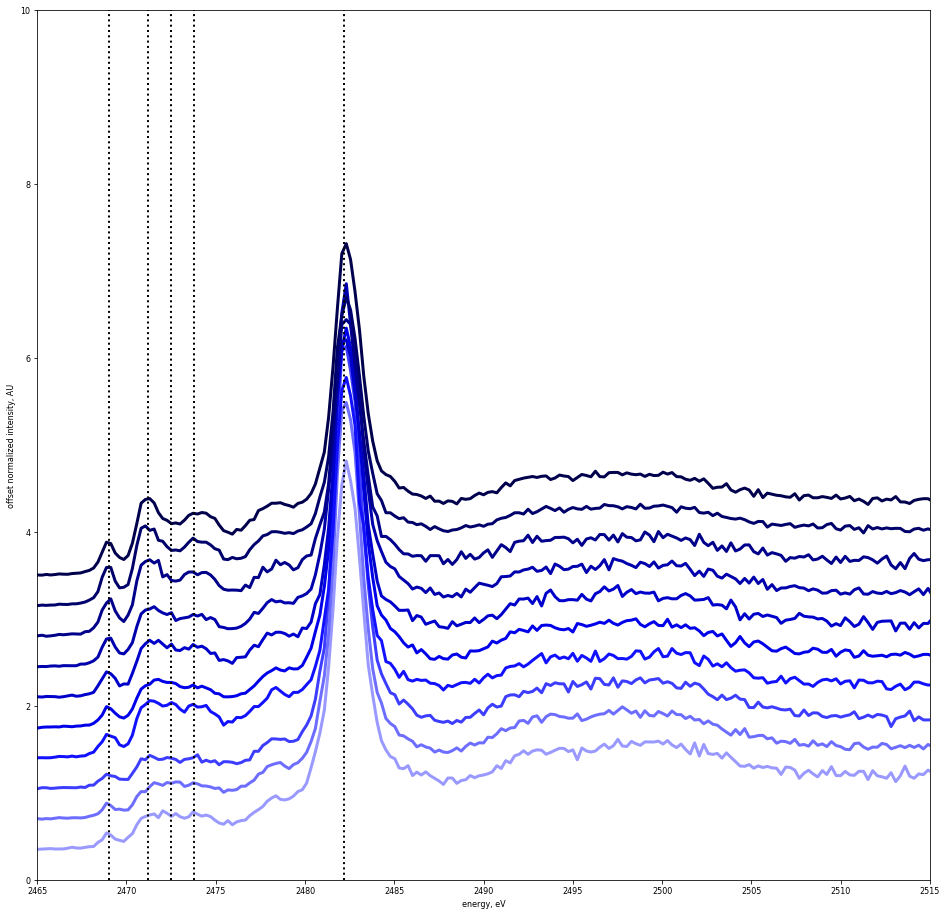

In [31]:
##waterwall plotting, bigger, just to see
plt.figure(figsize=(16,16))

offset = 0 #giving offset a start value
n = all_data.shape[1] #number of columns in dataframe is the number of colors needed
color = iter(cm.seismic_r(np.linspace(0.6,1,n))) #assigning the colormap type to be iterated over the number of columns
    #cm... is the name of the colormap; put '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html
    
#waterfall maker
for name in all_data_re:
    offset = offset+0.35   ##CHOOSE Y OFFSET HERE
    c = next(color)
    #plt.scatter(all_data.index, all_data[name]+offset, marker='.', s=18, label=name, c = c)
    plt.plot(energy_18, all_data_re[name]+offset, c = c, linewidth = 3)
    
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('XANES')
plt.ylabel('offset normalized intensity, AU')
plt.xlabel('energy, eV')
plt.xlim(2465,2515)   #not needed if subsample data above
plt.ylim(0,10)
xticks(np.arange(2465,2515.001, step=5))

axvline(2469.0, linewidth = 2, linestyle = ':', color = 'k')
axvline(2471.2, linewidth = 2, linestyle = ':', color = 'k')
axvline(2472.5, linewidth = 2, linestyle = ':', color = 'k')
axvline(2473.8, linewidth = 2, linestyle = ':', color = 'k')
axvline(2482.2, linewidth = 2, linestyle = ':', color = 'k')

plt.show()

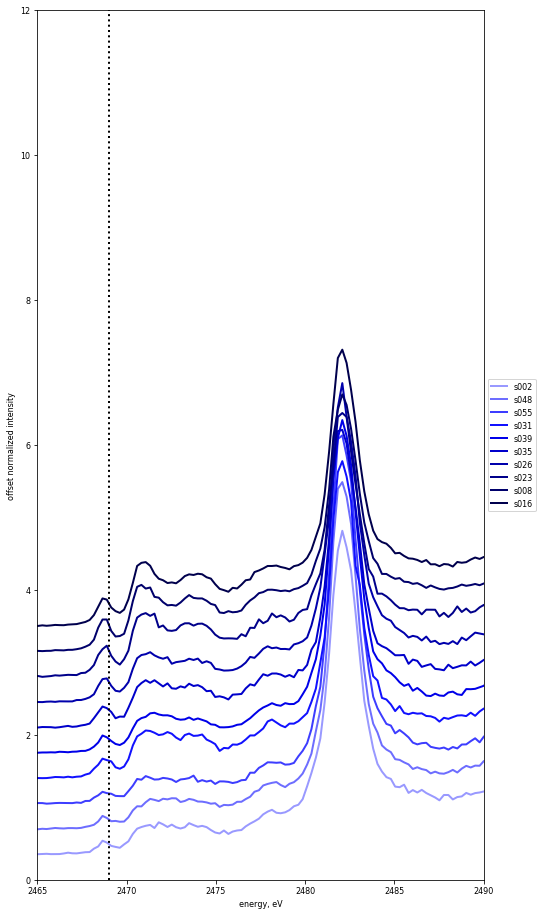

In [32]:
##To see PRE moving energy by 0.23 eV relative to corrected energy of pre-peak (the vertical line)

##waterwall plotting
plt.figure(figsize=(8,16))

offset = 0 #giving offset a start value
n = all_data.shape[1] #number of columns in dataframe is the number of colors needed
color = iter(cm.seismic_r(np.linspace(0.6,1,n))) #assigning the colormap type to be iterated over the number of columns
    #cm... is the name of the colormap; put '_r' after this reverses the order
    #linspace(X,Y,n), the X,X is range of colors through which your n plots will step through
        #colormaps I like: seismic, jet, CMRmap, ocean, terrain, gist_earth, gnuplot2, winter
        #see: https://matplotlib.org/examples/color/colormaps_reference.html
    
#waterfall maker
for name in all_data_re:
    offset = offset+0.35   ##CHOOSE Y OFFSET HERE
    c = next(color)
    #plt.scatter(all_data.index, all_data[name]+offset, marker='.', s=18, label=name, c = c)
    plt.plot(all_data.index, all_data_re[name]+offset, c = c, linewidth = 2)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.title('XANES')
plt.ylabel('offset normalized intensity')
plt.xlabel('energy, eV')
plt.xlim(2465,2490)   #not needed if subsample data above
plt.ylim(0,12)
xticks(np.arange(2465,2491, step=5))

axvline(2469, linewidth = 2, linestyle = ':', color = 'k')

plt.show()

### end